### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy.special import expit
from sklearn.metrics import confusion_matrix
from sklearn import svm
import datetime

In [2]:
os.chdir('C:/Users/soumya/Desktop/BI/Soumya - Projects')
df = pd.read_csv('Customer Segmentation.csv', encoding = "unicode_escape")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [3]:
df = df.drop_duplicates()
df.dropna(inplace=True)
df.shape

(401604, 8)

In [4]:
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [5]:
df['CustomerID'] = df['CustomerID'].astype('category')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0


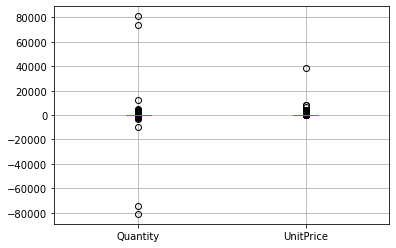

In [8]:
df.boxplot()

In [9]:
df.drop(df[df['Quantity'] > 6000].index, inplace=True)
df.drop(df[df['UnitPrice'] > 6000].index, inplace=True)
#df.drop(df[df['Quantity'] < 0].index, inplace=True)
df.drop(df[df['UnitPrice'] < 0].index, inplace=True)
df.shape

(401597, 8)

In [10]:
df.nunique()

InvoiceNo      22183
StockCode       3684
Description     3896
Quantity         433
InvoiceDate    20453
UnitPrice        617
CustomerID      4371
Country           37
dtype: int64

In [11]:
print(df.isna().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Converting into appropriate dtypes and bivariate analysis

In [12]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate']) 
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day
df['Hours'] = pd.DatetimeIndex(df['InvoiceDate']).hour

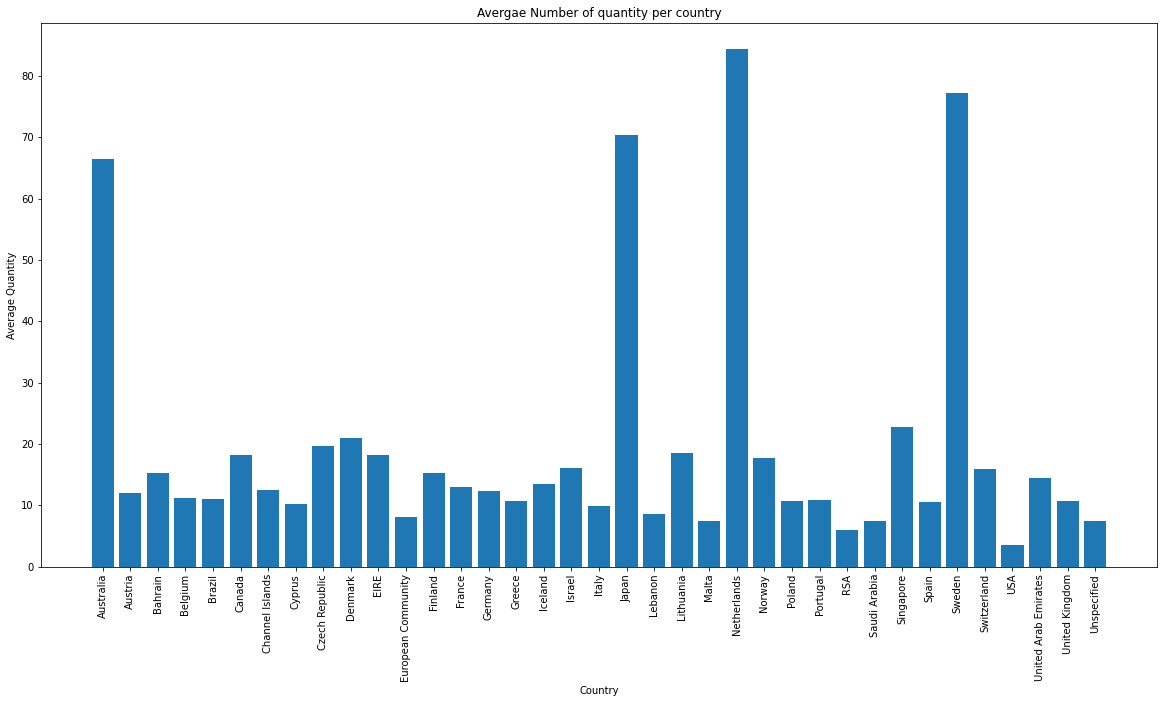

In [13]:
#country V/s Quantity

plt.figure(figsize =(20,10))

Quantity_by_Invoice = df.groupby('Country').Quantity.mean()

x= Quantity_by_Invoice.index.tolist()
y= Quantity_by_Invoice.values.tolist()

plt.xlabel('Country')
plt.ylabel('Average Quantity')
plt.xticks(rotation=90)


plt.title('Avergae Number of quantity per country')

plt.bar(x,y)
plt.show()

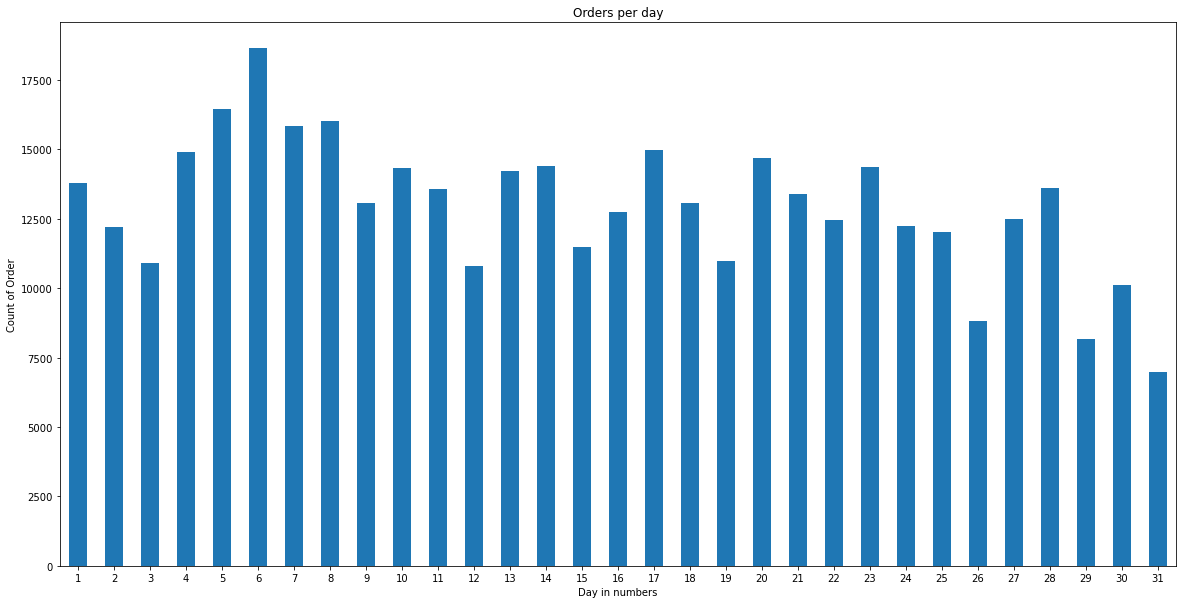

In [14]:
plt.figure(figsize =(20,10))
order_day = df.groupby(["Day"])["Quantity"].agg("count").plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Orders per day')
plt.xlabel('Day in numbers')
plt.ylabel('Count of Order')
plt.show()

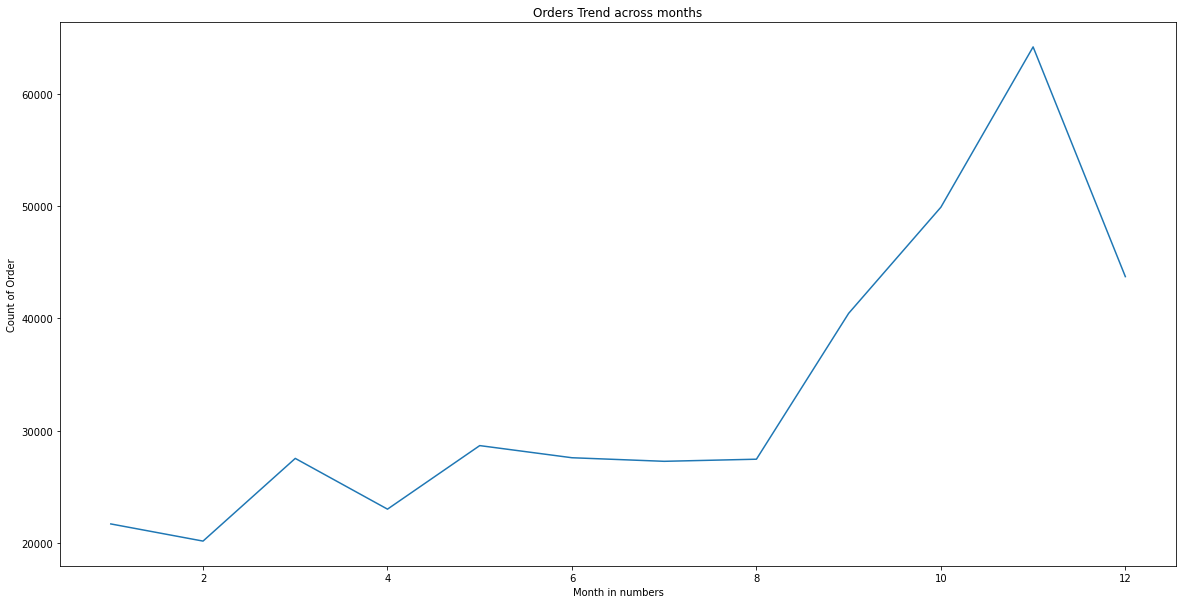

In [15]:
plt.figure(figsize =(20,10))
order_month = df.groupby(["Month"])["InvoiceNo"].agg("count").plot(kind = 'line')
plt.xticks(rotation=0)
plt.title('Orders Trend across months')
plt.xlabel('Month in numbers')
plt.ylabel('Count of Order')
plt.show()

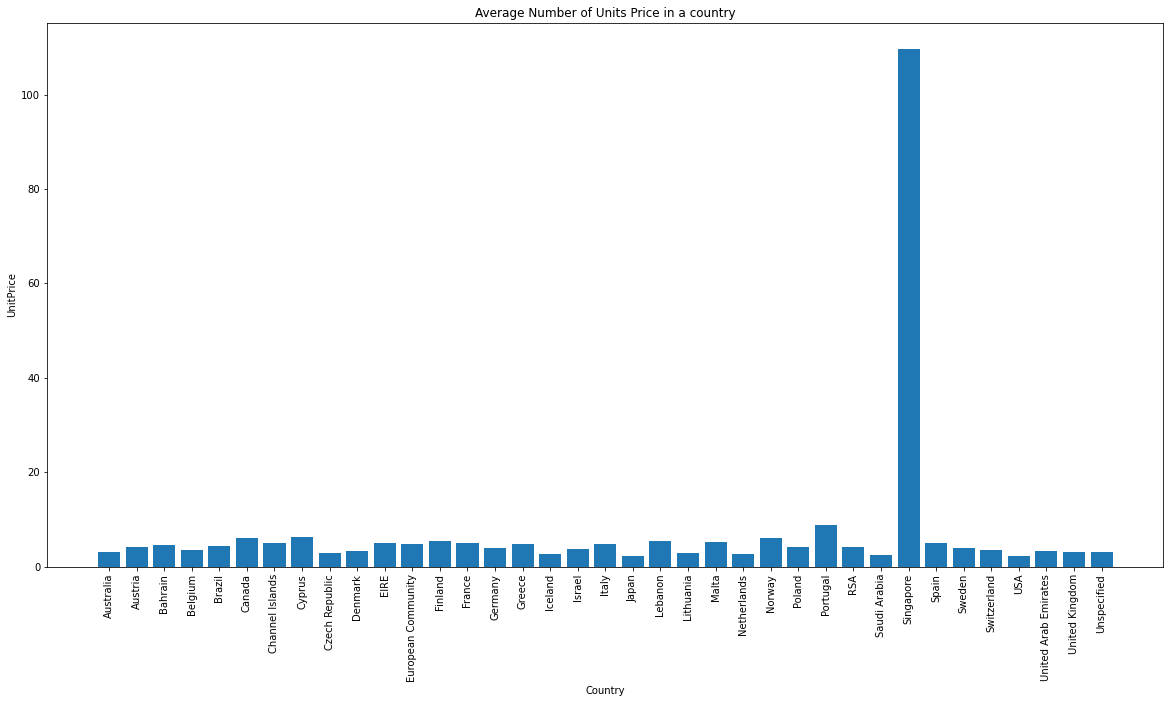

In [16]:
#country V/s Unit Price

plt.figure(figsize =(20,10))

Quantity_by_Invoice = df.groupby('Country').UnitPrice.mean()

x= Quantity_by_Invoice.index.tolist()
y= Quantity_by_Invoice.values.tolist()

plt.xlabel('Country')
plt.ylabel('UnitPrice')
plt.xticks(rotation=90)


plt.title('Average Number of Units Price in a country')

plt.bar(x,y)
plt.show()

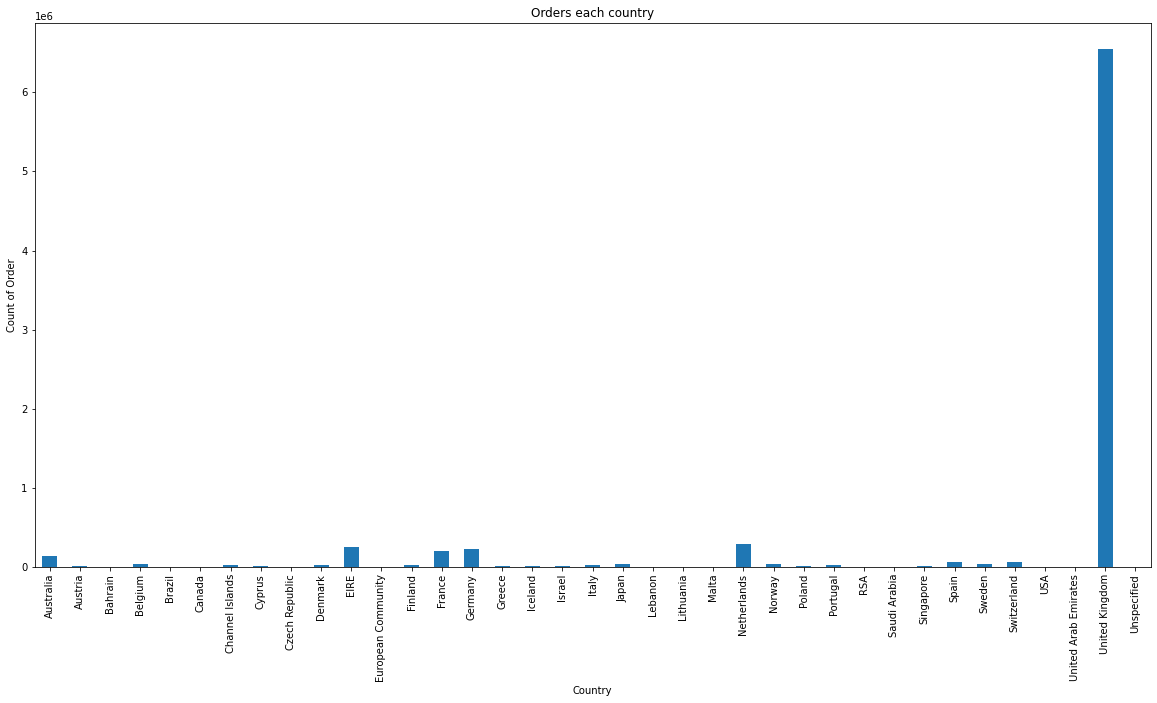

In [17]:
df["Total_purchase"] = df["UnitPrice"] * df["Quantity"]

plt.figure(figsize =(20,10))
Spent_Country = df.groupby(["Country"])["Total_purchase"].agg("sum").plot(kind = 'bar')
plt.title('Orders each country')
plt.xlabel('Country')
plt.ylabel('Count of Order')
Spent_Country

## ANALYSING TOP CUSTOMERS

### Invoice- wise


In [18]:
Total_order=df.groupby('InvoiceNo')['InvoiceNo'].agg('count')
a = Total_order.unique().sum()
print('Total orders made by customers are', a)

Total orders made by customers are 23275


### Quantity- wise



In [19]:
Total_order=df.groupby('Quantity')['Quantity'].agg('count')
b = Total_order.unique().sum()
print('Total quaintity ordered made by customers are', b)

Total quaintity ordered made by customers are 398413


### Net sales

In [20]:
df_returns = df[df['Quantity'] < 0]
Total_order_returned=df_returns.groupby('Quantity')['Quantity'].agg('count')
r = Total_order_returned.unique().sum()
print('Total quaintity ordered returned by customers are', r)
print('net sales', b-r)

Total quaintity ordered returned by customers are 8572
net sales 389841


### Returns

In [21]:
cust_return = df[df['Total_purchase'] < 0]
Cost = cust_return.groupby(["CustomerID"])["Total_purchase"].agg("sum").nsmallest(5)
Cost

CustomerID
16446.0   -168469.6
12346.0    -77183.6
15749.0    -22998.4
16029.0    -12609.4
12744.0    -12158.9
Name: Total_purchase, dtype: float64

### Top 5 customers

In [22]:
top_five_customer = df.groupby(["CustomerID"])["Quantity"].agg("count").nlargest(5)
print('top five customers are', top_five_customer)

top five customers are CustomerID
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
Name: Quantity, dtype: int64


### Total money spent

In [23]:
Total_money_spent = (df.UnitPrice*df.Quantity).sum()
print('The total money spent by all customers is', Total_money_spent)

The total money spent by all customers is 8078766.224


## Creating a pivot table with Total_purchase, times_bought, last_bought


In [24]:
cust_data_purchase = df.groupby('CustomerID')['Total_purchase'].sum().reset_index()
cust_data_purchase.head()

,CustomerID,Total_purchase
0,12346.0,-77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [25]:
cust_data_freq = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns={'CustomerID':'CustomerID','InvoiceNo':'times_bought'})
cust_data_freq.head()

,CustomerID,times_bought
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [26]:
cust_data_quant = df.groupby('CustomerID')['Quantity'].sum().reset_index()
cust_data_quant.head()

,CustomerID,Quantity
0,12346.0,-74215
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [27]:
df['last_purchase'] =  max(df['InvoiceDate']) - df['InvoiceDate']
cust_data_pur = df.groupby('CustomerID') ['last_purchase'].min().reset_index()
cust_data_pur['last_purchase'] = cust_data_pur['last_purchase'].dt.days
cust_data_pur.head()

,CustomerID,last_purchase
0,12346.0,325.0
1,12347.0,1.0
2,12348.0,74.0
3,12349.0,18.0
4,12350.0,309.0


In [28]:
cust_total_1 = pd.merge(cust_data_purchase,cust_data_freq , on = "CustomerID", how = "inner")
cust_total =  pd.merge(cust_total_1,cust_data_pur , on = "CustomerID", how = "inner")
cust_total['last_purchase'].fillna(0, inplace = True)

cust_total.head()

,CustomerID,Total_purchase,times_bought,last_purchase
0,12346.0,-77183.60,1,325.0
1,12347.0,4310.00,182,1.0
2,12348.0,1797.24,31,74.0
3,12349.0,1757.55,73,18.0
4,12350.0,334.40,17,309.0


## standard scaling

In [29]:
from sklearn.preprocessing import StandardScaler


cust_total_df = cust_total[['Total_purchase','times_bought','last_purchase']]

scaler = StandardScaler()

df_scaled = scaler.fit_transform(cust_total_df)
#df_scaled = pd.DataFrame(df_scaled)
#df_scaled.columns = ['Purchase', 'Freqency','Quantity', 'last_purchase']
#df_scaled['last_purchase'].fillna(0, inplace = True)

## Kmeans clustering

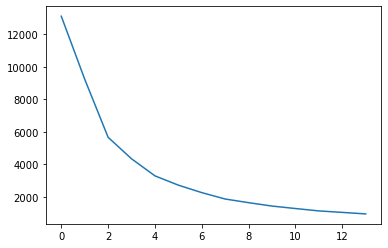

In [30]:
from sklearn.cluster import KMeans
ssd = []
range_of_cluster = range(1,15)
for optimal_num_cluster in range_of_cluster:
    kmeans = KMeans(n_clusters = optimal_num_cluster , max_iter = 500)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [31]:
kmeans = KMeans(n_clusters=3, random_state=108, max_iter = 1000).fit(df_scaled)
Clusters = kmeans.labels_


In [32]:
cust_total_new = cust_total
cust_total_new['cust_total_df'] = kmeans.labels_
cust_total_new.columns = ['CustomerID','Purchase', 'Freqency', 'last_purchase','Cluster']

cust_total_new.head()

,CustomerID,Purchase,Freqency,last_purchase,Cluster
0,12346.0,-77183.60,1,325.0,2
1,12347.0,4310.00,182,1.0,1
2,12348.0,1797.24,31,74.0,1
3,12349.0,1757.55,73,18.0,1
4,12350.0,334.40,17,309.0,2


In [33]:
cust_total_new['Cluster'].value_counts()

1    3260
2    1098
0      14
Name: Cluster, dtype: int64

## Analaysing segments

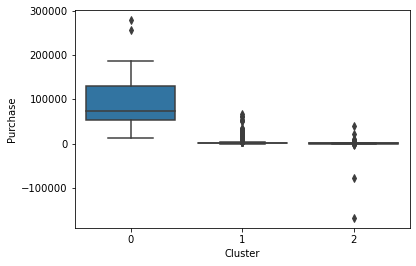

In [34]:
sns.boxplot(x= "Cluster" , y = "Purchase", data = cust_total )

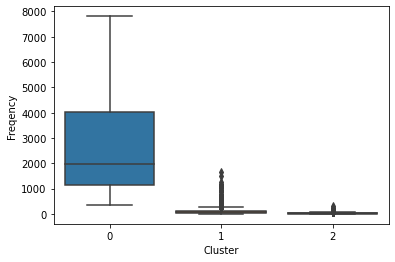

In [35]:
sns.boxplot(x= "Cluster" , y = "Freqency", data = cust_total )

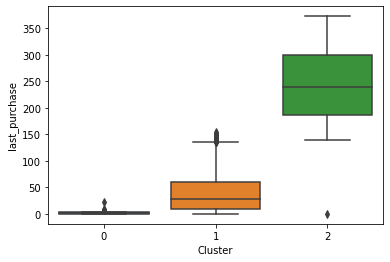

In [36]:
sns.boxplot(x= "Cluster" , y = "last_purchase", data = cust_total )

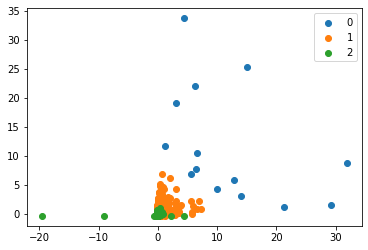

In [38]:
label = kmeans.labels_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df_scaled[label == i , 0] , df_scaled[label == i , 1] , label = i)
plt.legend()
plt.show()

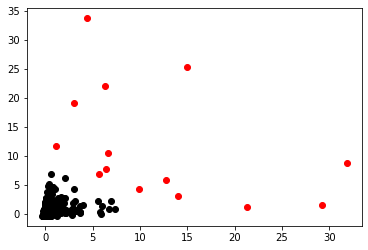

In [39]:
filtered_label2 = df_scaled[label == 0]
 
filtered_label1 = df_scaled[label == 1]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

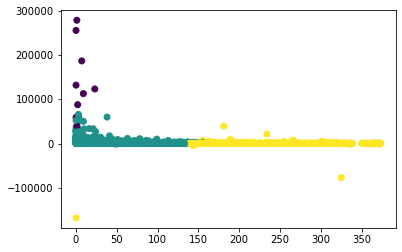

In [40]:
plt.scatter(cust_total['last_purchase'], cust_total['Purchase'], c = cust_total['Cluster'])
plt.show()

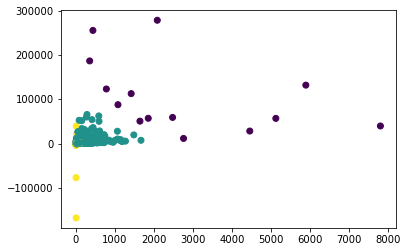

In [41]:
plt.scatter(cust_total['Freqency'], cust_total['Purchase'], c = cust_total['Cluster'])
plt.show()

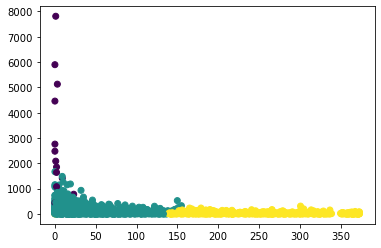

In [42]:
plt.scatter(cust_total['last_purchase'], cust_total['Freqency'], c = cust_total['Cluster'])
plt.show()

## AgglomerativeClustering

In [43]:
from sklearn.cluster import AgglomerativeClustering

hierarch_model = AgglomerativeClustering(n_clusters=3)

hierarch_label = hierarch_model.fit_predict(df_scaled)

cust_total['hierarch_label'] = hierarch_label

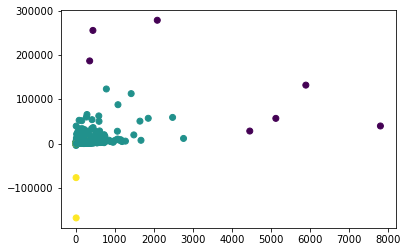

In [44]:
plt.scatter(cust_total['Freqency'], cust_total['Purchase'], c = cust_total['hierarch_label'])
plt.show()

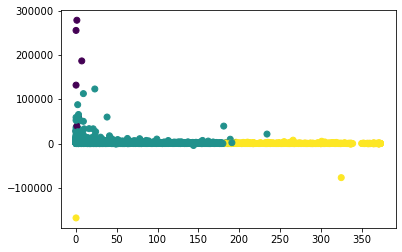

In [45]:
plt.scatter(cust_total['last_purchase'], cust_total['Purchase'], c = cust_total['hierarch_label'])
plt.show()

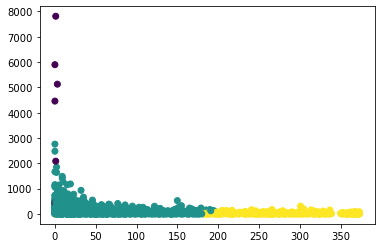

In [46]:
plt.scatter(cust_total['last_purchase'], cust_total['Freqency'], c = cust_total['hierarch_label'])
plt.show()

In [47]:
cust_total['hierarch_label'].value_counts()

1    3525
2     840
0       7
Name: hierarch_label, dtype: int64

## Analaysing segments

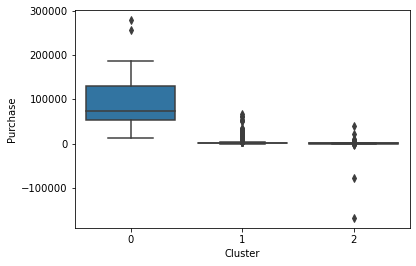

In [48]:
sns.boxplot(x= "Cluster" , y = "Purchase", data = cust_total )

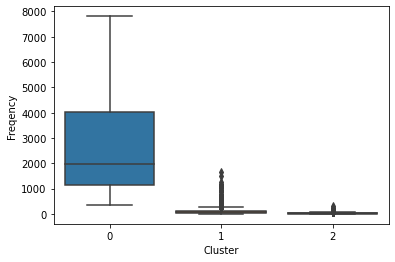

In [49]:
sns.boxplot(x= "Cluster" , y = "Freqency", data = cust_total )

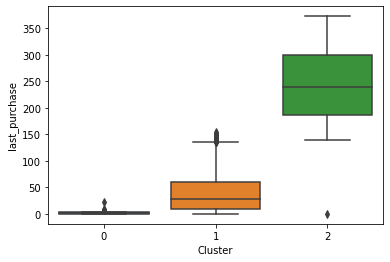

In [50]:
sns.boxplot(x= "Cluster" , y = "last_purchase", data = cust_total )